In [18]:
#samo siri prikaz u notebook-u
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
import pprint, genalg

In [31]:
with open('podaci.json', "r", encoding='utf-8-sig') as f:
    podaci = json.loads(f.read())

In [32]:
ulazni_podaci, generacije = genalg.glavna_funk(podaci, write_to_file=True, file_name="rezultati.json")

  1. generacija -> population average fit: 174.90068397177882, best chromosome fit: 560.6745276197761
  2. generacija -> population average fit: 174.90068397177882,  best chromosome fit: 560.6745276197761
  3. generacija -> population average fit: 235.92803430644847,  best chromosome fit: 572.1168649181388
  4. generacija -> population average fit: 154.9273914409754,  best chromosome fit: 549.4610370673805
  5. generacija -> population average fit: 253.0802395630861,  best chromosome fit: 549.4610370673805
  6. generacija -> population average fit: 248.7176649930731,  best chromosome fit: 549.4610370673805
  7. generacija -> population average fit: 345.44381862321956,  best chromosome fit: 560.6745276197761
  8. generacija -> population average fit: 430.7010182476733,  best chromosome fit: 560.6745276197761
  9. generacija -> population average fit: 551.4233979140498,  best chromosome fit: 560.6745276197761
 10. generacija -> population average fit: 560.6745276197761,  best chromosome 

In [33]:
pprint.pprint(ulazni_podaci)

{'dani': [1, 2, 3, 4, 5],
 'dvorane': {1: {'id': 1, 'kapacitet': 50, 'naziv': 'D1', 'spec': {'S', 'P'}},
             2: {'id': 2, 'kapacitet': 70, 'naziv': 'D2', 'spec': {'S', 'P'}},
             3: {'id': 3, 'kapacitet': 100, 'naziv': 'D3', 'spec': {'P'}},
             4: {'id': 4, 'kapacitet': 100, 'naziv': 'D4', 'spec': {'L'}}},
 'grupe': {1: {'id': 1, 'kapacitet': 30, 'naziv': 'G1'},
           2: {'id': 2, 'kapacitet': 25, 'naziv': 'G2'},
           3: {'id': 3, 'kapacitet': 70, 'naziv': 'G3'},
           4: {'id': 4, 'kapacitet': 45, 'naziv': 'G4'},
           5: {'id': 5, 'kapacitet': 30, 'naziv': 'G5'},
           6: {'id': 6, 'kapacitet': 50, 'naziv': 'G6'},
           7: {'id': 7, 'kapacitet': 70, 'naziv': 'G7'}},
 'kolegiji': {1: {'id': 1, 'naziv': 'Kolegij1'},
              2: {'id': 2, 'naziv': 'Kolegij2'},
              3: {'id': 3, 'naziv': 'Kolegij3'},
              4: {'id': 4, 'naziv': 'Kolegij4'},
              5: {'id': 5, 'naziv': 'Kolegij5'},
              6: {'i

In [35]:
pprint.pprint(genalg.json_rez(generacije['best'], ulazni_podaci))

('[{"fit": 572.1168649181388, "hard_dev": 0, "hard_pos": [], "jedinka": '
 '[{"dan": 4, "dvorana": "D2", "grupa": "G1", "kolegij": "Kolegij1", '
 '"profesor": "Ime1 Prezime1", "termin": [8, 7]}, {"dan": 2, "dvorana": "D1", '
 '"grupa": "G2", "kolegij": "Kolegij2", "profesor": "Ime1 Prezime1", "termin": '
 '[2, 3, 4]}, {"dan": 1, "dvorana": "D3", "grupa": "G3", "kolegij": '
 '"Kolegij5", "profesor": "Ime2 Prezime2", "termin": [4, 5]}, {"dan": 4, '
 '"dvorana": "D4", "grupa": "G2", "kolegij": "Kolegij1", "profesor": "Ime3 '
 'Prezime3", "termin": [3, 4, 5]}, {"dan": 3, "dvorana": "D3", "grupa": "G5", '
 '"kolegij": "Kolegij2", "profesor": "Ime5 Prezime5", "termin": [8, 9]}, '
 '{"dan": 2, "dvorana": "D2", "grupa": "G4", "kolegij": "Kolegij7", '
 '"profesor": "Ime3 Prezime3", "termin": [3, 4, 5]}, {"dan": 5, "dvorana": '
 '"D1", "grupa": "G6", "kolegij": "Kolegij6", "profesor": "Ime5 Prezime5", '
 '"termin": [12]}, {"dan": 5, "dvorana": "D1", "grupa": "G4", "kolegij": '
 '"Kolegij4", "pro

In [36]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

x = list(range(len(generacije['all'])))
y = [populacija['avg_fit'] for populacija in generacije['all']]
y_lower = [populacija['avg_fit'] - populacija['std_fit'] for populacija in generacije['all']]
y_upper = [populacija['avg_fit'] + populacija['std_fit'] for populacija in generacije['all']]

upper_bound = go.Scatter(
    name='Upper Bound',
    x=x,
    y=y_upper,
    mode='lines',
    marker=dict(color="#444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=x,
    y=y,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x=x,
    y=y_lower,
    marker=dict(color="#444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound]

layout = go.Layout(
    yaxis=dict(title='Fitness populacije', range=[0, 1000]),
    xaxis=dict(title='Generacije populacija'),
    title='Fitness populacija svih generacija',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-continuous-error-bars')

<Figure size 432x288 with 0 Axes>

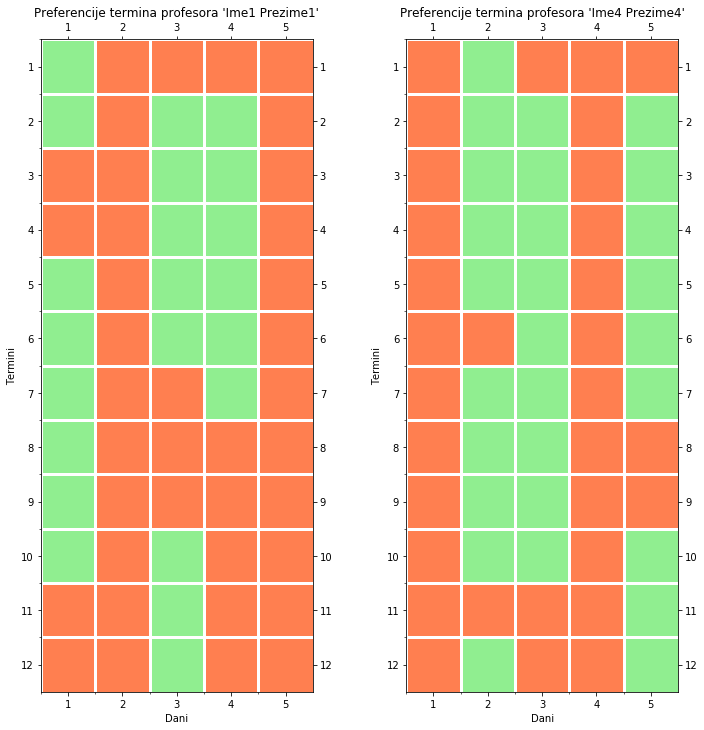

In [37]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

def pref_matrix(ulazni_podaci, prof_id):
    podaci = {r['dan']: sorted(list(r['termini'])) for r in ulazni_podaci['preferencije']['profesori'][prof_id]['odabir']}
    podaci.update({d: [] for d in ulazni_podaci['dani'] if d not in podaci})
    return [[1.0 if j in podaci[i] else 0.0 for i in ulazni_podaci['dani']] for j in ulazni_podaci['termini']]

fig = plt.figure()
fig, ax = plt.subplots(1, len(ulazni_podaci['preferencije']['profesori']), figsize=(12,12))
for j in range(len(ulazni_podaci['preferencije']['profesori'])):
    ax[j].set_xticks([i - 0.5 for i in range(len(ulazni_podaci['dani']))], minor=True)
    ax[j].set_yticks([i - 0.5 for i in range(len(ulazni_podaci['termini']))], minor=True)
    ax[j].grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax[j].tick_params(top=True, bottom=True, labeltop=True, labelbottom=True, right=True, left=True, labelright=True, labelleft=True)
    ax[j].set_xticklabels(['']+[str(d) for d in ulazni_podaci['dani']])
    ax[j].set_yticklabels(['']+[str(t) for t in ulazni_podaci['termini']])
    tick_spacing = 1
    ax[j].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[j].yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax[j].set_title(f"Preferencije termina profesora '{ulazni_podaci['nastavnici'][ulazni_podaci['preferencije']['profesori'][j]['p_id']]['preime']}'")
    ax[j].set_xlabel('Dani')
    ax[j].set_ylabel('Termini')
    heatplot = ax[j].imshow(pref_matrix(ulazni_podaci, j), cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["coral","lightgreen"]))